# EX1 - TSA
## In this exercise  you will play with two dummy sequences, visualize them and measure distances using Euclidean and DTW

# Input data

In [20]:
import numpy as np
a = np.array([0,0,0,1,1,10,10,100,100,500,500,1000,0])
b = np.array([0,1,10,100,500,1000,0,0,0,0,0,0,0])

## Visualize
(Run twice to see the output)

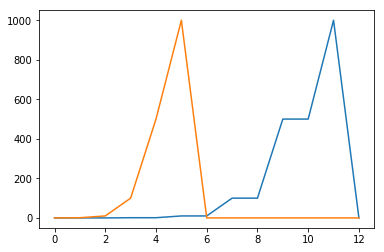

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(len(a)), a)
plt.plot(range(len(b)), b)
plt.show()

# <span style="color:red">Q1:</span> Think - would you say the two have a similar pattern?

## <span style="color:red">A:</span> Yes i would!

# Euclidean distance

In [22]:
print("Euclidean distance:")
print(np.linalg.norm(a-b))

Euclidean distance:
1661.0547853698263


# <span style="color:red">Q2:</span> Is the euclidean distance representing the distance properly?

## <span style="color:red">A:</span>

# Using center of mass

## Utils
 Use this function to center the time series.
 To find the center we use scipy.ndimage.measurements.center_of_mass (note the return type)

In [23]:
from collections import deque
def recenter(arr, arr_center):
    items = deque(arr)
    for i in range(len(arr)):
        items.append(0)
    items.rotate(len(arr)-int(arr_center))
    return np.array(items)

## Recenter the sequences

In [24]:
from scipy import ndimage
a_center = ndimage.measurements.center_of_mass(a)[0]
b_center = ndimage.measurements.center_of_mass(b)[0]
a_recenter = recenter(a, a_center)
b_recenter = recenter(b, b_center)

## Plot the recentered time series

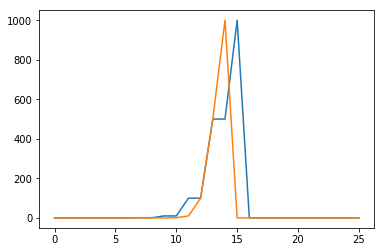

In [25]:
plt.plot(range(len(a_recenter)), a_recenter)
plt.plot(range(len(b_recenter)), b_recenter)
plt.show()

In [26]:
a

array([   0,    0,    0,    1,    1,   10,   10,  100,  100,  500,  500,
       1000,    0])

In [27]:
b

array([   0,    1,   10,  100,  500, 1000,    0,    0,    0,    0,    0,
          0,    0])

In [28]:
print("Centerized Euclidean distance:")
print(np.linalg.norm(a_recenter-b_recenter))

Centerized Euclidean distance:
1121.7321427150066


## <span style="color:red">Q3:</span> What impact did using center of mass had on the distnace?

## <span style="color:red">A:</span>

# DTW
## Install the package

In [29]:
!pip install dtw

## Compute DTW

In [30]:
from dtw import dtw
# reshape to make it work
x = a.reshape(-1, 1)
y = b.reshape(-1, 1)

# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2

d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=l2_norm)

print("DTW:")
print(d)

DTW:
0.0


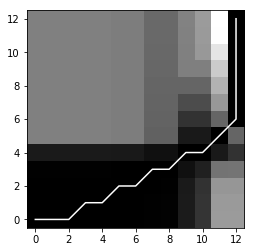

In [31]:
# You can also visualise the accumulated cost and the shortest path
import matplotlib.pyplot as plt

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

## <span style="color:red">Q4:</span> How can the distance be 0? Take a look at the sequences again.

## <span style="color:red">A:</span> 

## Another example
### In this case y is a sub-sequence of x

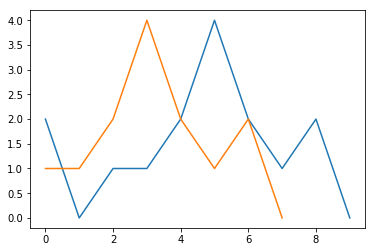

In [16]:
x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
plt.plot(range(len(x)), x)
plt.plot(range(len(y)), y)
plt.show()

## <span style="color:red">Q4.1:</span> Take a carefull look at the two sequences. Would you expect a high or low distance between them?

## <span style="color:red">A:</span> 

DTW:
0.1111111111111111


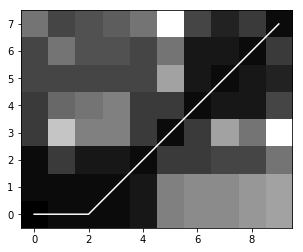

In [17]:
d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=l2_norm)
print("DTW:")
print(d)

# You can also visualise the accumulated cost and the shortest path
import matplotlib.pyplot as plt

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

## "Bonus question"

## <span style="color:red">Q5:</span> Take a carefull look at the two sequences below. Keep in mind the formula for DTW. Would you expect a high or low distance between them? Why?

## <span style="color:red">A:</span>

In [ ]:
x = np.array([0,0,0,1,10,100]).reshape(-1, 1)
y = np.array([0,1,10,100,0,0]).reshape(-1, 1)
plt.plot(range(len(x)), x)
plt.plot(range(len(y)), y)
plt.show()

In [ ]:
d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=l2_norm)
print(d)

# You can also visualise the accumulated cost and the shortest path
import matplotlib.pyplot as plt

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

## <span style="color:red">Q6:</span> What is the reason you got this results? How can you "fix" this?

## <span style="color:red">A:</span>

# Great work!